In [194]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [195]:
import resultcomp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import plots
import json
import numpy as np
import os
mpl.rcParams['figure.dpi'] = 300
results_dir = './../../results'

In [196]:
region = 'australia'
start = 'australia-20200525_144539'
end = 'australia-baseline'

In [197]:
def string_range(strings, start=None, end=None):
    keep = []
    include = False
    for string in strings:
        if string.startswith(start):
            include = True
        if include:
            keep.append(string)
        if end is not None and string.startswith(end):
            include = False
    return keep

In [198]:
result_directories = sorted(os.listdir(results_dir))
directories = string_range(result_directories, start, end)
df = pd.DataFrame(columns=['scale', 'directory', 'p', 'gamma', 'beta', 'mse'])

In [199]:
metrics = None
for d in directories:
    p = "{}/{}/sa3-metrics.csv".format(results_dir, d)
    if not os.path.exists(p):
        continue
    s = pd.read_csv(p)
    s = s.assign(run_id=d).set_index(['run_id', 'zone'])
    if metrics is None:
        metrics = s
    else:
        metrics = pd.concat([metrics, s])

In [200]:
def mse(dms, df, gt='groundtruth_sum', md='model_sum'):
    sq_errs = np.square(np.subtract(dms[gt], dms[md]))
    for model in dms.index.get_level_values(level=0).unique():
        if model != region + '-baseline':
            with open(results_dir + '/' + model+ '/parameters.json') as f:
                d = json.load(f)
            
            df2 = pd.DataFrame({'directory': [model], 'p': [d['model']['p']], 'gamma': [d['model']['gamma']], 'beta': [d['model']['region_sampling']['beta']], 'mse': [sq_errs.loc[model].mean()]})
        else:
            df2 = pd.DataFrame({'directory': [model], 'p': [None], 'gamma': [None], 'beta': [None], 'mse': [sq_errs.loc[model].mean()]})
        df = df.append(df2)
    return df

In [201]:
df = pd.DataFrame(columns=['directory', 'p', 'gamma', 'beta', 'mse'])
if region == 'australia':
    df = mse(metrics, df, gt='groundtruth', md='model')
else:
    df = mse(metrics, df).set_index('directory')

In [202]:
if region == 'saopaulo':
    df = df.drop('saopaulo-20200519_224039')

In [203]:
df.sort_values('mse')

,directory,p,gamma,beta,mse
0,australia-20200525_173525,0.3,0.8,0.07,1018.821791
0,australia-20200525_162327,0.3,0.8,0.04,1088.062704
0,australia-20200525_152449,0.3,0.8,0.01,1377.507710
0,australia-20200525_201125,0.6,0.8,0.07,4265.534998
0,australia-20200525_180628,0.6,0.8,0.01,4509.887004
0,australia-20200525_190840,0.6,0.8,0.04,4582.177611
0,australia-20200525_160259,0.3,0.5,0.04,5418.375610
0,australia-20200525_150538,0.3,0.5,0.01,5427.498460
0,australia-20200525_170822,0.3,0.5,0.07,6047.429013
0,australia-20200525_190712,0.9,0.8,0.04,9387.141997


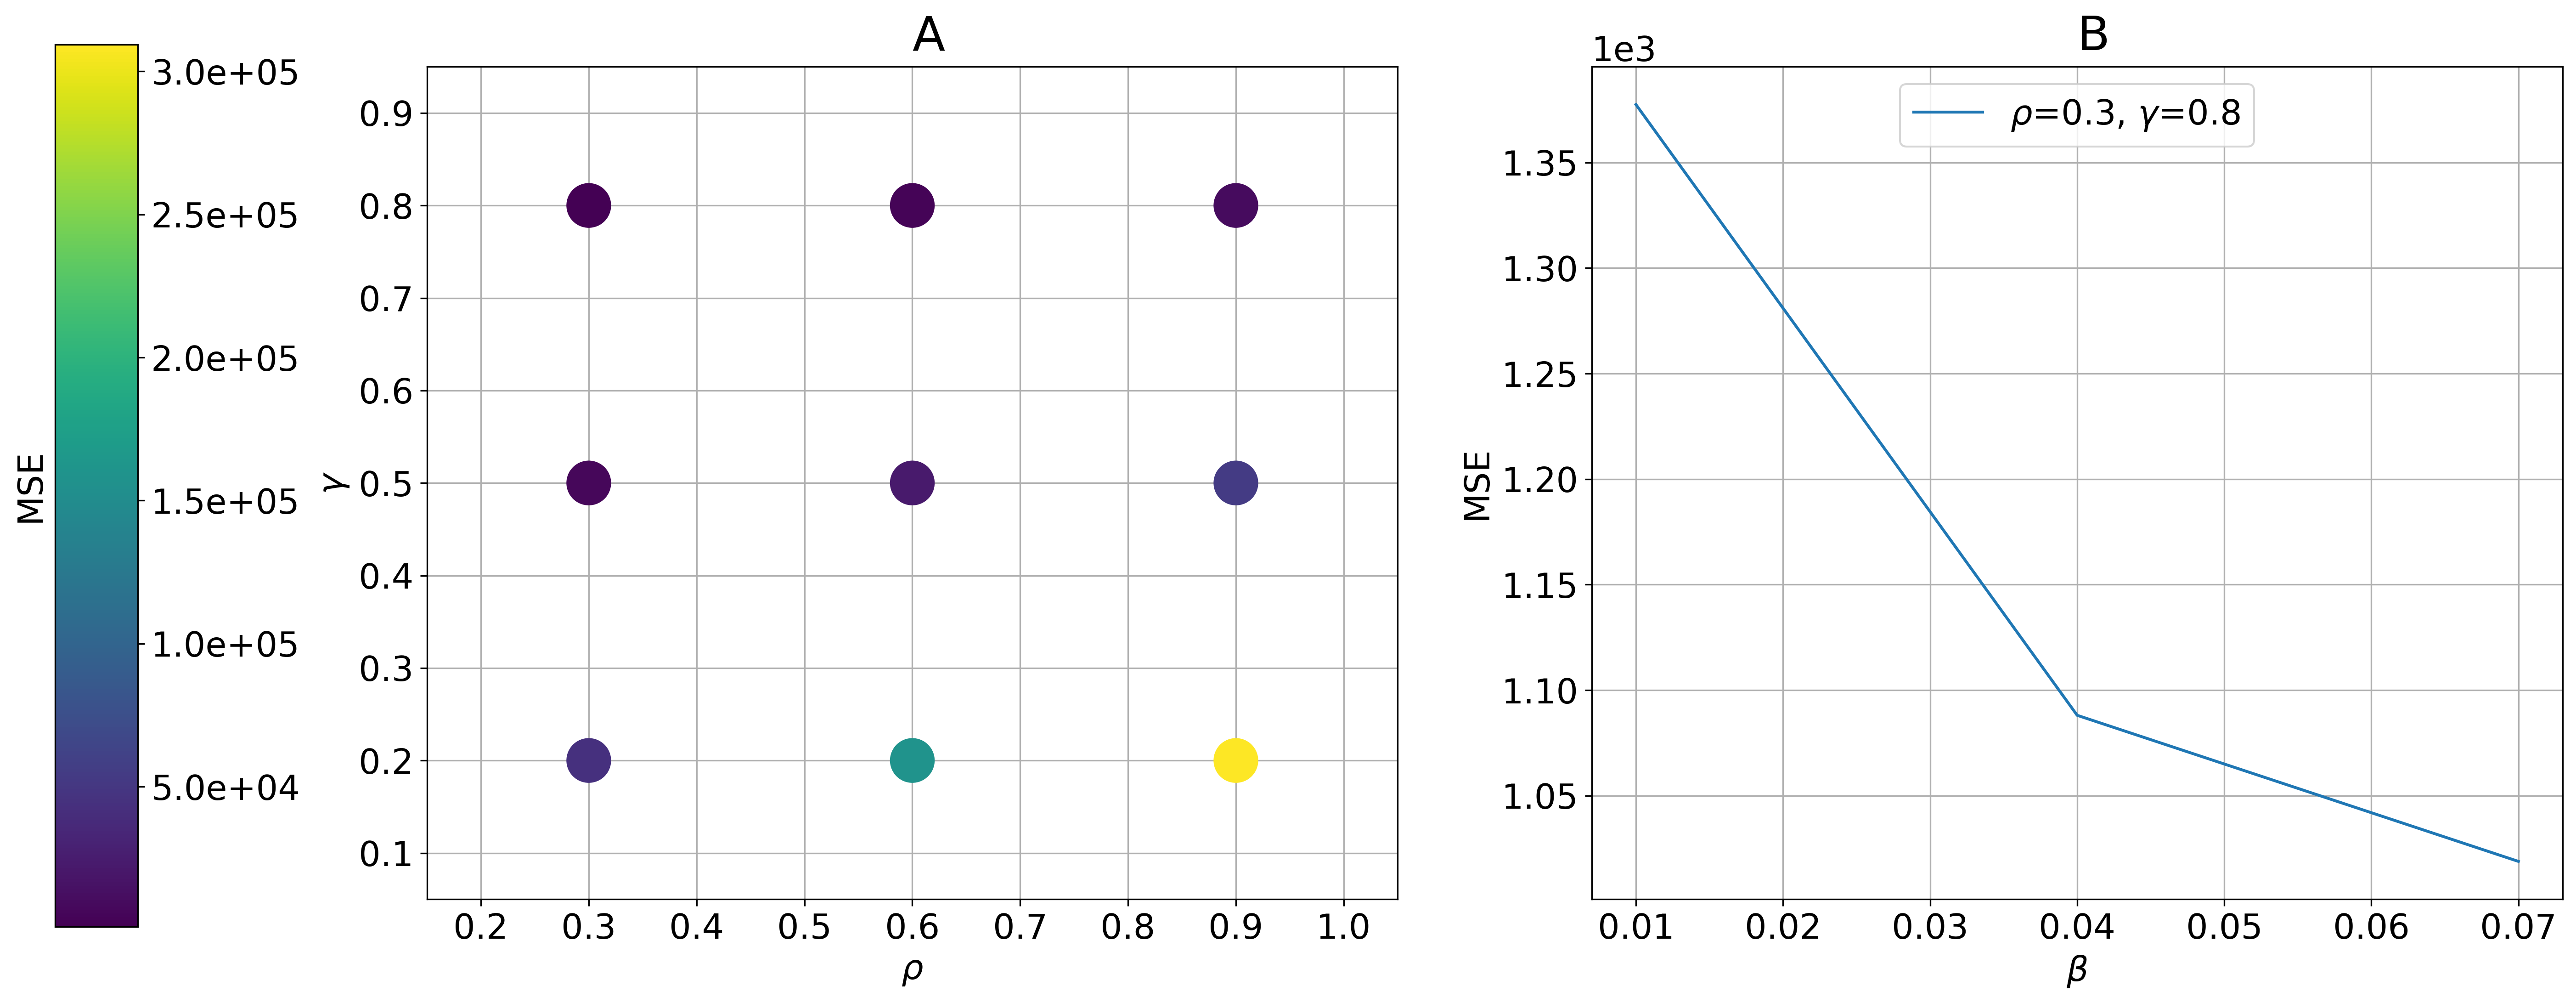

In [204]:
plots.generic_plot_gridsearch(df, fix_beta=0.07, lines=[[0.3,0.8]])

# Netherlands

In [205]:
region = 'netherlands'
start = 'netherlands-20200518_235511'
end = 'netherlands-baseline'

In [206]:
result_directories = sorted(os.listdir(results_dir))
directories = string_range(result_directories, start, end)

In [207]:
metrics = None
for d in directories:
    p = "{}/{}/distance-metrics.csv".format(results_dir, d)
    if not os.path.exists(p):
        continue
    s = pd.read_csv(p)
    s = s.assign(run_id=d).set_index(['run_id', 'distance'])
    if metrics is None:
        metrics = s
    else:
        metrics = pd.concat([metrics, s])

In [208]:
df = pd.DataFrame(columns=['directory', 'p', 'gamma', 'beta', 'mse'])
df = mse(metrics, df).set_index('directory')

In [209]:
df.sort_values('mse').head(5)

,p,gamma,beta,mse
directory,,,,
netherlands-20200519_231349,0.6,0.45,0.04,0.000001
netherlands-20200520_002557,0.7,0.50,0.04,0.000001
netherlands-20200519_231327,0.7,0.45,0.04,0.000001
netherlands-20200520_002623,0.6,0.50,0.04,0.000002
netherlands-20200520_013329,0.7,0.55,0.04,0.000002


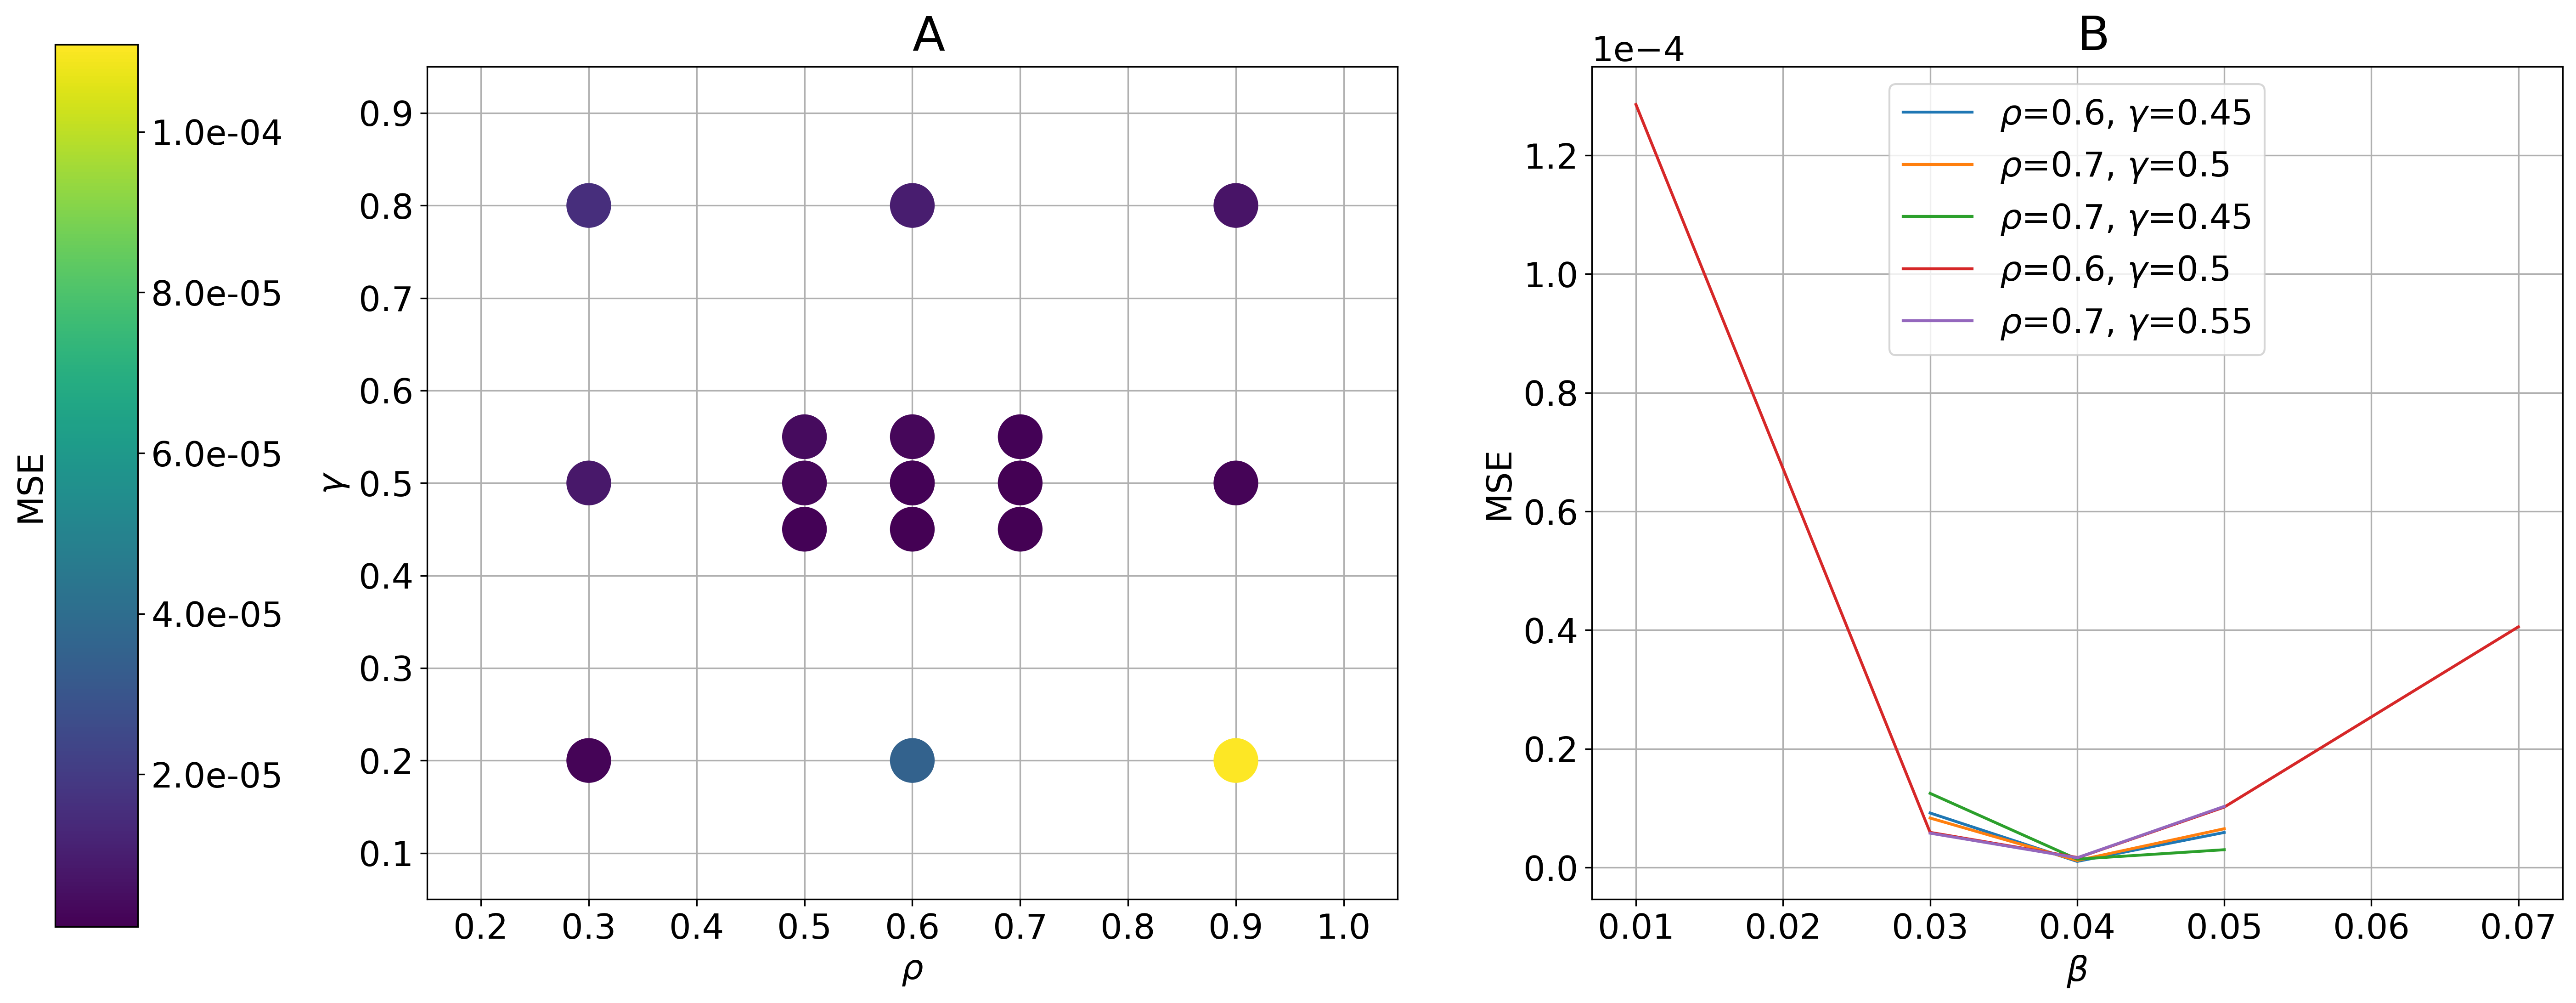

In [210]:
plots.generic_plot_gridsearch(df, lines=[[0.6,0.45], [0.7, 0.5], [0.7,0.45], [0.6,0.5], [0.7,0.55]])

# Sao Paulo

In [211]:
region = 'saopaulo'
start = 'saopaulo-20200518_170056'
end = 'saopaulo-baseline'

In [212]:
result_directories = sorted(os.listdir(results_dir))
directories = string_range(result_directories, start, end)

In [213]:
metrics = None
for d in directories:
    p = "{}/{}/distance-metrics.csv".format(results_dir, d)
    if not os.path.exists(p):
        continue
    s = pd.read_csv(p)
    s = s.assign(run_id=d).set_index(['run_id', 'distance'])
    if metrics is None:
        metrics = s
    else:
        metrics = pd.concat([metrics, s])

In [214]:
df = pd.DataFrame(columns=['directory', 'p', 'gamma', 'beta', 'mse'])
df = mse(metrics, df).set_index('directory')

In [215]:
df.sort_values('mse').head(5)

,p,gamma,beta,mse
directory,,,,
saopaulo-20200520_031639,0.7,0.50,0.05,0.000003
saopaulo-20200520_013906,0.6,0.45,0.05,0.000003
saopaulo-20200520_001050,0.6,0.55,0.04,0.000004
saopaulo-20200520_014634,0.7,0.45,0.05,0.000004
saopaulo-20200519_223930,0.5,0.50,0.04,0.000004


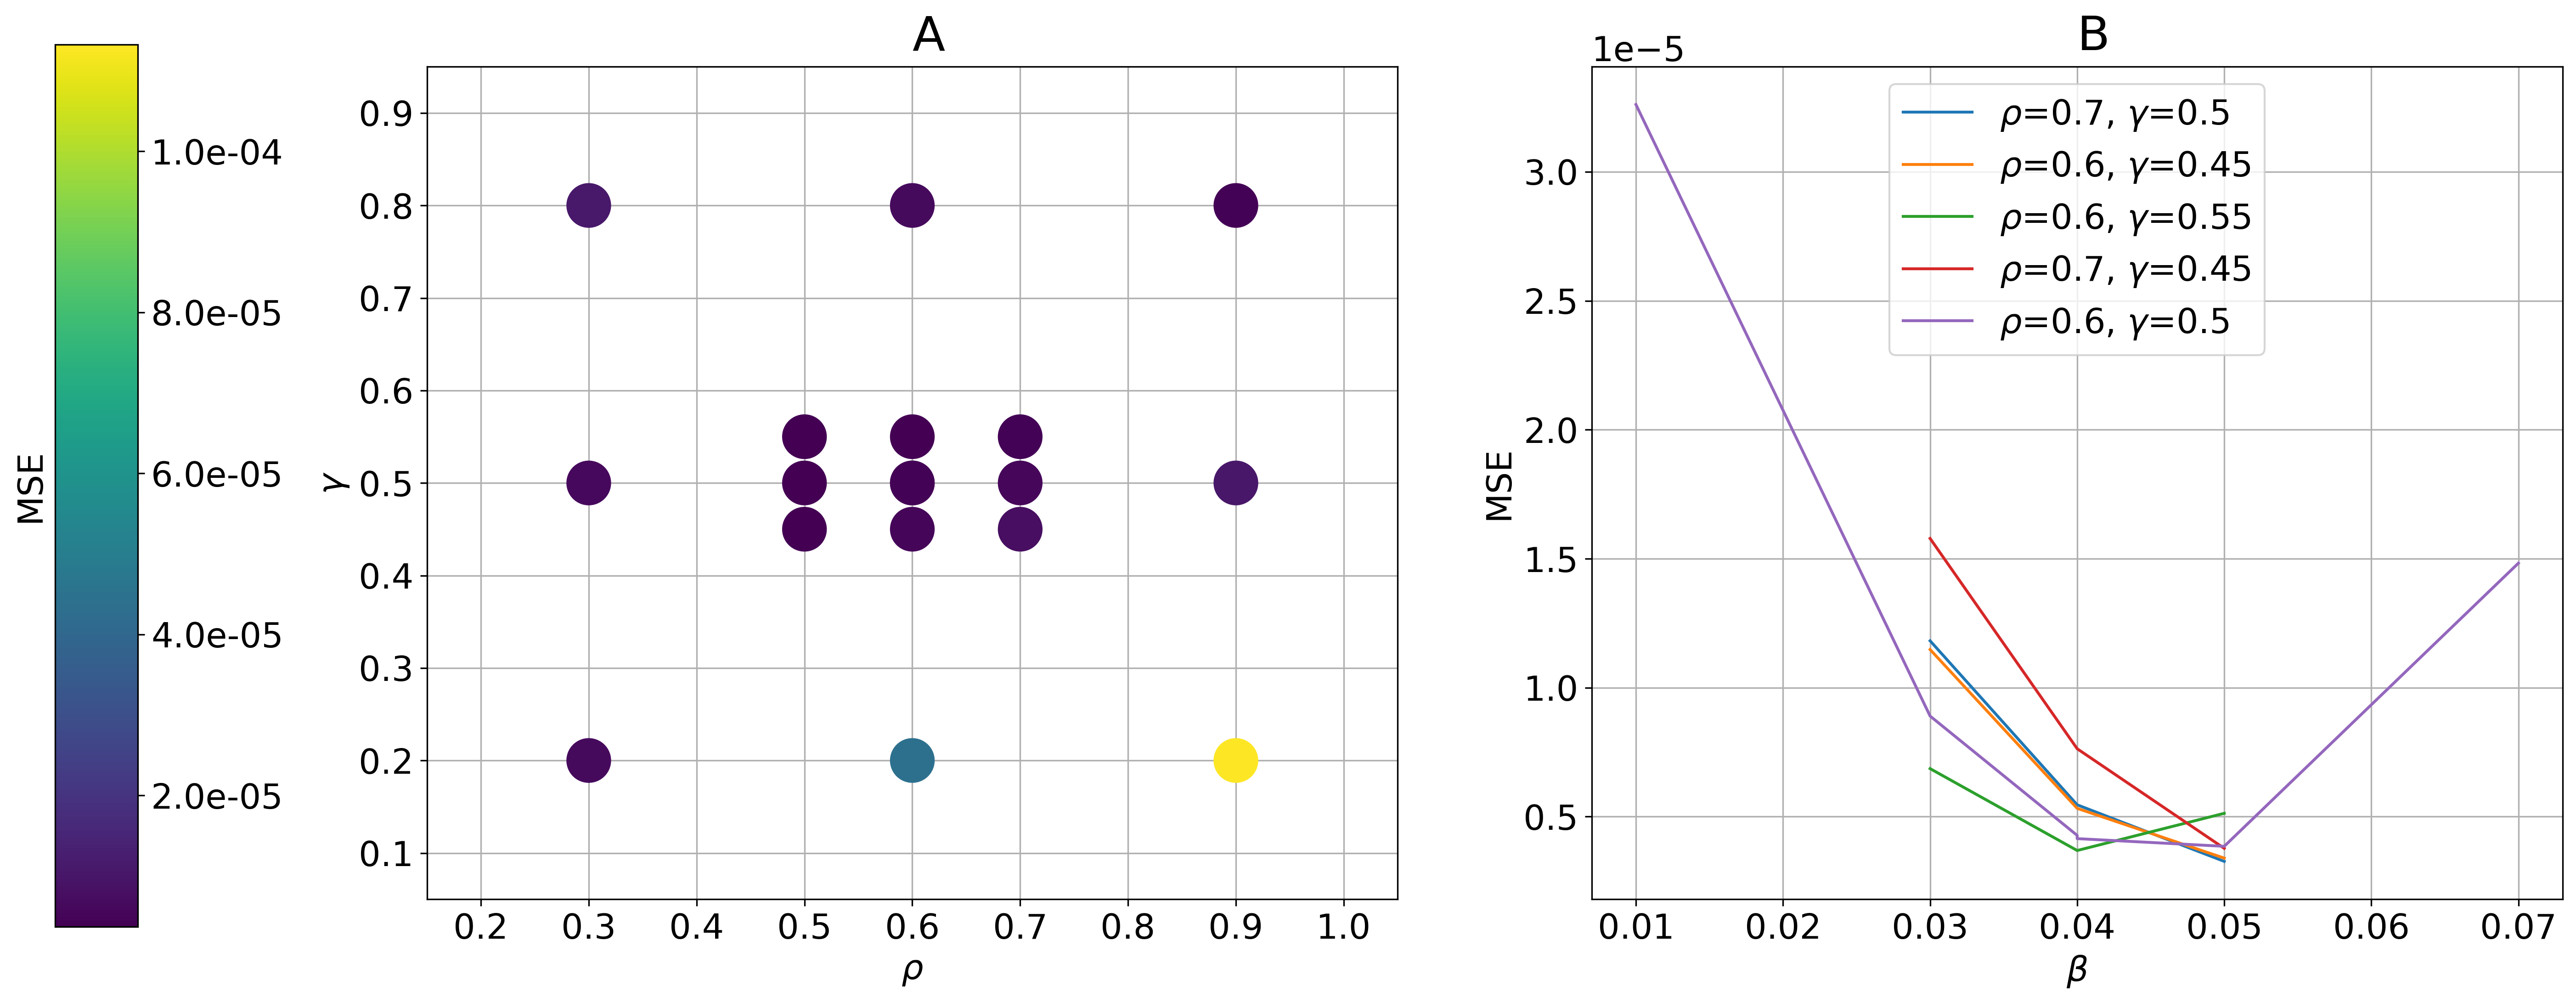

In [216]:
plots.generic_plot_gridsearch(df, lines=[[0.7,0.5], [0.6, 0.45], [0.6,0.55], [0.7,0.45], [0.6,0.5]])

# Sweden

In [217]:
mse = resultcomp.results_mse(directories=None, start='20200515_173829', end='20200518_050952', include_model=True).set_index('directory')

In [218]:
mse_sum = mse.groupby(['directory', 'p', 'gamma','beta']).sum()[['mse']].reset_index()
df = mse_sum
df = df.drop(7)
df.sort_values('mse').head(5)

,directory,p,gamma,beta,mse
53,model,0.4,0.75,0.03,0.000026
45,20200517_235708,0.4,0.80,0.03,0.000027
30,20200516_112959,0.3,0.80,0.03,0.000029
28,20200516_110349,0.3,0.75,0.03,0.000031
46,20200518_004128,0.4,0.85,0.03,0.000032


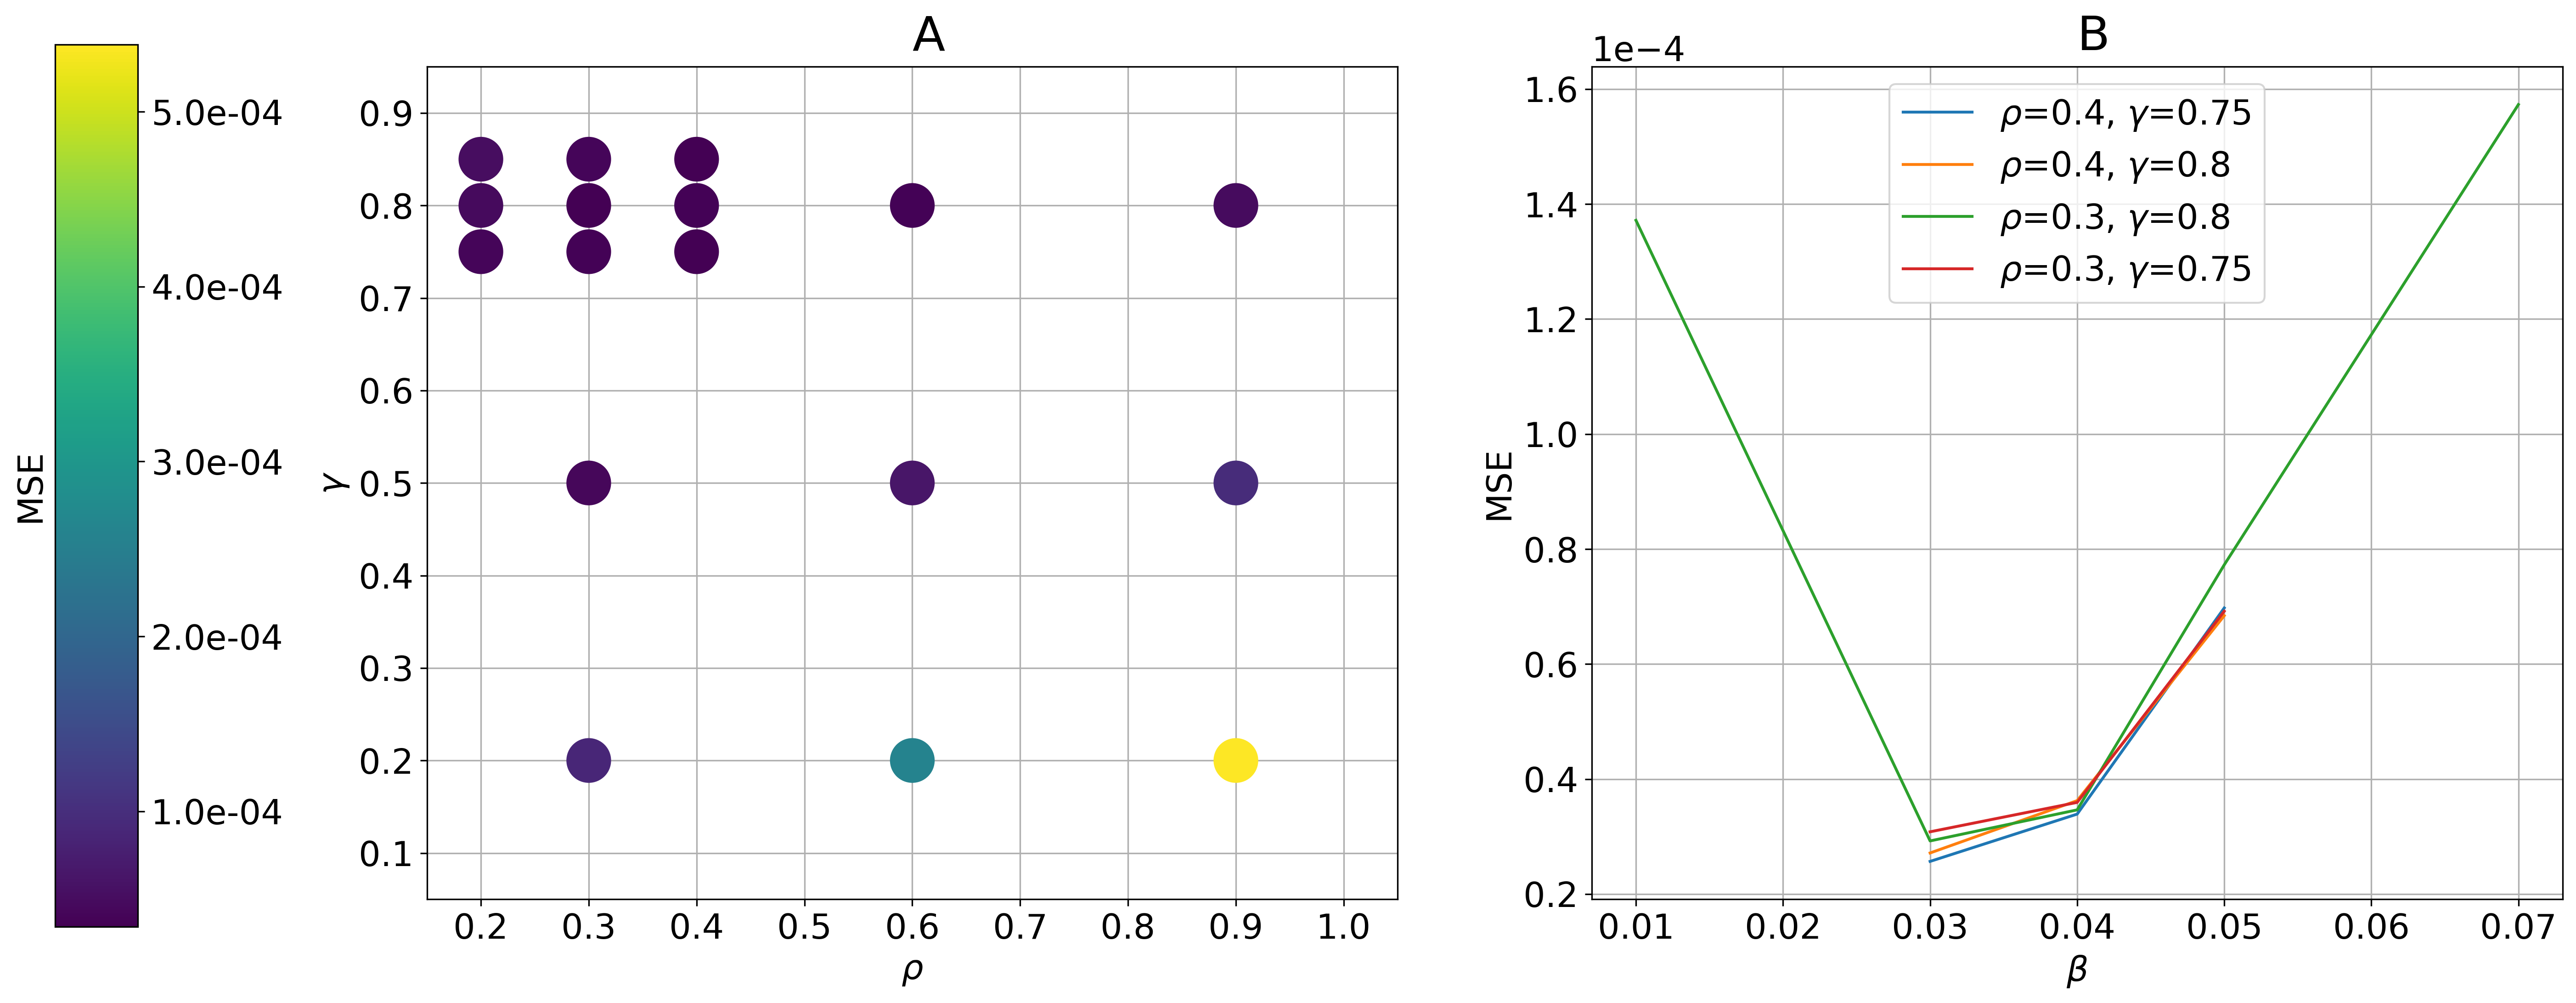

In [219]:
plots.generic_plot_gridsearch(df, lines=[[0.4,0.75], [0.4, 0.8], [0.3,0.8], [0.3,0.75]])